# OkCupid User Analysis: San Francisco




Approaching my impending move from New York to San Francisco it seemed that everybody in New York had an insider’s view of what it was like to live in San Francisco. "There are so many guys there!", "It's so expensive!", 'Every single person is a Liberal!"

As excited as I was for the move, I couldn't help but wonder what the dating scene would look like in San Francisco. Would it be different than in New York? 

So how does somebody in the 21st century get an idea as to what the dating scene looks like in a city they have not yet arrived in? They access open source data from a popular dating site to conduct statistical analysis! 

Below you will find a detailed explanation of what I thought I'd find through analysis, my thought and experimentation process, and some of the insights I came away with. 

Some initial ponderings....	
        
1. What percentage of OkCupid users are male vs female?
2. What age demographic do OkCupid user's fall into?
3. How much do different OkCupid users earn on average by demographic?
4. Besides age and gender, what other demographics or groups can I separate OkCupid users by given the dataset?
5. Who are OkCupids most/least engaged users? 


My Hypotheses...
1. User engagement is correlated with user age
2. User engagement is correlated with Race
3. User engagement is correlated with income 


Challenges and Blockers...
The dataset contained missing values, outliers, and poorly formatted values that had to be dealt with and often required a unique solution.
All categorical data had to be moved into its own column before running it through any regression models because machine learning models cannot easily understand categorical data.



# Importing Relevant Analytical Tools

In [37]:

import pandas as pd
import numpy as np
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Connecting to the Database 

In [38]:
database = "okcupid_sqlite.db"
connection = sqlite3.connect(database)

# SQL Query Joining Relevant Tables and Assigning them to a Dataframe

In [39]:
df_demographic = pd.read_sql_query("""
       SELECT d.id, d.location, d.offspring, b.body_type, st.status, sm.smokes, o.orientation,dr.drugs,dri.drinks,di.diet,c.job,c.income,d.sex,d.last_online,d.age,h.heightcol,ot.pets,ot.religion,ot.sign,ot.speaks,e.education
       FROM demographic d
       LEFT JOIN bodytype b ON d.body_type =b.btid
       LEFT JOIN status st ON d.status = st.STSID
       LEFT JOIN smoker sm ON d.smokes = sm.SID
       LEFT JOIN orientation o ON d.orientation = o.ORID
       LEFT JOIN drugs dr ON d.drugs = dr.DRGID
       LEFT JOIN drinks dri ON d.drinks = dri.DRID
       LEFT JOIN diet di ON d.diet = di.DID
       LEFT JOIN career c ON d.id=c.id
       LEFT JOIN other ot ON ot.id = d.id
       LEFT JOIN education e ON d.id = e.id
       LEFT JOIN height h ON d.id = h.id
       WHERE d.last_online > 2016
        
    """, connection)

df_demographic = df_demographic.set_index('id')

df_demographic

,location,offspring,body_type,status,smokes,orientation,drugs,drinks,diet,job,income,sex,last_online,age,heightcol,pets,religion,sign,speaks,education
id,,,,,,,,,,,,,,,,,,,,
1,"south san francisco, california","doesn't have kids, but might want them",a little extra,single,sometimes,straight,never,socially,strictly anything,transportation,-1,m,2017-06-28-20-30,22,75,likes dogs and likes cats,agnosticism and very serious about it,gemini,english,working on college/university
2,"oakland, california","doesn't have kids, but might want them",average,single,no,straight,sometimes,often,mostly other,hospitality / travel,80000,m,2017-06-29-21-41,35,70,likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (...",working on space camp
3,"san francisco, california",None,thin,available,no,straight,None,socially,anything,None,-1,m,2017-06-27-09-10,38,68,has cats,None,pisces but it doesn&rsquo;t matter,"english, french, c++",graduated from masters program
4,"berkeley, california",doesn't want kids,thin,single,no,straight,None,socially,vegetarian,student,20000,m,2017-06-28-14-22,23,71,likes cats,None,pisces,"english, german (poorly)",working on college/university
5,"san francisco, california",None,athletic,single,no,straight,never,socially,None,artistic / musical / writer,-1,m,2017-06-27-21-26,29,66,likes dogs and likes cats,None,aquarius,english,graduated from college/university
6,"san francisco, california","doesn't have kids, but might want them",average,single,no,straight,None,socially,mostly anything,computer / hardware / software,-1,m,2017-06-29-19-18,29,67,likes cats,atheism,taurus,"english (fluently), chinese (okay)",graduated from college/university
7,"san francisco, california",None,fit,single,None,straight,never,socially,strictly anything,None,-1,f,2017-06-25-20-45,32,65,likes dogs and likes cats,None,virgo,english,graduated from college/university
8,"san francisco, california","doesn't have kids, but wants them",average,single,no,straight,never,socially,mostly anything,artistic / musical / writer,-1,f,2017-06-29-12-30,31,65,likes dogs and likes cats,christianity,sagittarius,"english, spanish (okay)",graduated from college/university
9,"belvedere tiburon, california",doesn't have kids,None,single,when drinking,straight,None,socially,strictly anything,None,-1,f,2017-06-29-23-39,24,67,likes dogs and likes cats,christianity but not too serious about it,gemini but it doesn&rsquo;t matter,english,graduated from college/university


# Let's Take a Look at our Data

In [40]:
df_demographic.columns

Index([u'location', u'offspring', u'body_type', u'status', u'smokes',
       u'orientation', u'drugs', u'drinks', u'diet', u'job', u'income', u'sex',
       u'last_online', u'age', u'heightcol', u'pets', u'religion', u'sign',
       u'speaks', u'education'],
      dtype='object')

In [41]:
df_demographic.head()

,location,offspring,body_type,status,smokes,orientation,drugs,drinks,diet,job,income,sex,last_online,age,heightcol,pets,religion,sign,speaks,education
id,,,,,,,,,,,,,,,,,,,,
1,"south san francisco, california","doesn't have kids, but might want them",a little extra,single,sometimes,straight,never,socially,strictly anything,transportation,-1,m,2017-06-28-20-30,22,75,likes dogs and likes cats,agnosticism and very serious about it,gemini,english,working on college/university
2,"oakland, california","doesn't have kids, but might want them",average,single,no,straight,sometimes,often,mostly other,hospitality / travel,80000,m,2017-06-29-21-41,35,70,likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (...",working on space camp
3,"san francisco, california",None,thin,available,no,straight,None,socially,anything,None,-1,m,2017-06-27-09-10,38,68,has cats,None,pisces but it doesn&rsquo;t matter,"english, french, c++",graduated from masters program
4,"berkeley, california",doesn't want kids,thin,single,no,straight,None,socially,vegetarian,student,20000,m,2017-06-28-14-22,23,71,likes cats,None,pisces,"english, german (poorly)",working on college/university
5,"san francisco, california",None,athletic,single,no,straight,never,socially,None,artistic / musical / writer,-1,m,2017-06-27-21-26,29,66,likes dogs and likes cats,None,aquarius,english,graduated from college/university


In [42]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59943 entries, 1 to 60552
Data columns (total 20 columns):
location       59943 non-null object
offspring      24383 non-null object
body_type      54647 non-null object
status         59943 non-null object
smokes         54431 non-null object
orientation    59943 non-null object
drugs          45864 non-null object
drinks         56958 non-null object
diet           35549 non-null object
job            51745 non-null object
income         59943 non-null int64
sex            59943 non-null object
last_online    59943 non-null object
age            59943 non-null int64
heightcol      59943 non-null object
pets           40023 non-null object
religion       39717 non-null object
sign           48887 non-null object
speaks         59893 non-null object
education      53315 non-null object
dtypes: int64(2), object(18)
memory usage: 9.6+ MB


# Changing datatypes to be able to run analysis

In [43]:
df_demographic['sex'] = df_demographic['sex'].astype('category')


changed_list = ['body_type','status','smokes','orientation','drugs','drinks','diet','job','sex','last_online','heightcol','pets','religion','sign','speaks','education']
for i in changed_list:
    df_demographic[i] = df_demographic[i].astype('category')

# Creating a subset group to take just the attributes we want to measure/test

In [44]:
subset = df_demographic[['sex', 'age','location','education', 'body_type', 'income','offspring']].dropna()


subset.head()

,sex,age,location,education,body_type,income,offspring
id,,,,,,,
1,m,22,"south san francisco, california",working on college/university,a little extra,-1,"doesn't have kids, but might want them"
2,m,35,"oakland, california",working on space camp,average,80000,"doesn't have kids, but might want them"
4,m,23,"berkeley, california",working on college/university,thin,20000,doesn't want kids
6,m,29,"san francisco, california",graduated from college/university,average,-1,"doesn't have kids, but might want them"
8,f,31,"san francisco, california",graduated from college/university,average,-1,"doesn't have kids, but wants them"


In [45]:
subset_income = subset[subset['income']!=-1]

subset_income = subset_income[subset_income['income']<250000]

In [46]:
subset_income.head()

,sex,age,location,education,body_type,income,offspring
id,,,,,,,
2,m,35,"oakland, california",working on space camp,average,80000,"doesn't have kids, but might want them"
4,m,23,"berkeley, california",working on college/university,thin,20000,doesn't want kids
15,f,29,"san leandro, california",working on college/university,thin,50000,"doesn't have kids, but wants them"
44,m,40,"san francisco, california",graduated from college/university,fit,60000,doesn't have kids
73,m,35,"emeryville, california",graduated from space camp,athletic,150000,"doesn't have kids, but might want them"


# How old are people on OkCupid, generally? 

Text(0.5,1,u'Ages of people on OkCupid')

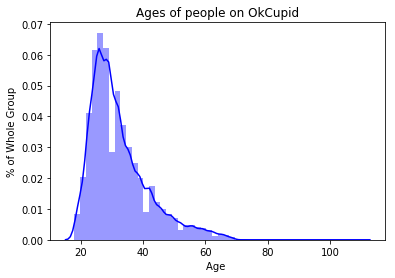

In [47]:
sns.distplot(df_demographic['age'], label = "age", color ="blue")

plt.ylabel("% of Whole Group")
plt.xlabel("Age ")
plt.title("Ages of people on OkCupid")

# Education levels affect income

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

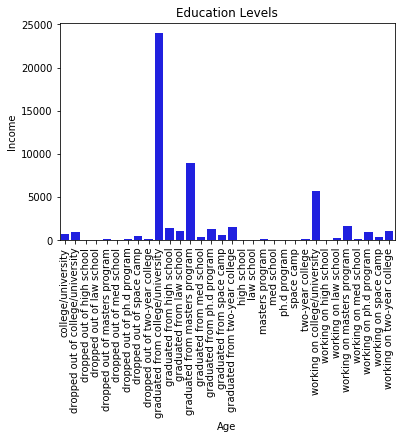

In [48]:
sns.countplot(df_demographic['education'], label = "Education", color ="blue")


plt.ylabel("Income")
plt.xlabel("Age")
plt.title("Education Levels")

plt.xticks(rotation = 90)

# The older you are, the more money you make

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

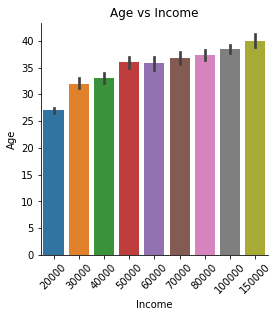

In [49]:
sns.factorplot(x='income', y = 'age', data = subset_income, kind = 'bar')


plt.ylabel("Age")
plt.xlabel("Income")
plt.title("Age vs Income")

plt.xticks(rotation = 45)

# Creating Male, Female and Age subsets 

In [50]:
male_subset = subset_income[subset_income['sex'] =='m']
female_subset = subset_income[subset_income['sex'] =='f']


female=subset_income[subset_income["sex"]=="f"]
female18= female[female['age'] >= 18]
female1824 = female18[female18['age'] <=24]
female25 = female[female['age'] >=25]
female2534 = female25[female25['age'] <=34] 
female35 = female[female['age'] >= 35]
female3544 = female35[female35['age'] <= 44]
female45up = female[female['age'] >=45]


male=subset_income[subset_income["sex"]=="m"]
male18= male[male['age'] >= 18]
male1824 = male18[male18['age'] <=24]
male25 = male[male['age'] >=25]
male2534 = male25[male25['age'] <=34] 
male35 = male[male['age'] >= 35]
male3544 = male35[male35['age'] <= 44]
male45up = male[male['age'] >=45]

print "Females"
print "The number of women between 18 and 24 is "+str(len(female1824['age']))
print "The number of women between 25 and 34 is "+str(len(female2534['age']))
print "The number of women between 35 and 44 is "+str(len(female3544['age']))
print "The number of women over 45 is "+str(len(female45up['age']))

print "-----------------------------------------------"

print "Males"
print "The number of men between 18 and 24 is "+str(len(male1824['age']))
print "The number of men between 25 and 34 is "+str(len(male2534['age']))
print "The number of men between 35 and 44 is "+str(len(male3544['age']))
print "The number of men over 45 is "+str(len(male45up['age']))

Females
The number of women between 18 and 24 is 327
The number of women between 25 and 34 is 585
The number of women between 35 and 44 is 308
The number of women over 45 is 301
-----------------------------------------------
Males
The number of men between 18 and 24 is 658
The number of men between 25 and 34 is 1480
The number of men between 35 and 44 is 669
The number of men over 45 is 503


# T-Testing shows that the difference in income between Men and Women using OkCupid is Statistically Significant 

In [51]:
import scipy as sp
alpha = .05
sp.stats.ttest_ind(male2534['income'], female2534['income'])

Ttest_indResult(statistic=8.5831679461766761, pvalue=1.7855278916288814e-17)

# If you're "Jacked" or "Used-up" you make a lot more money 

(array([      0.,   50000.,  100000.,  150000.]),
 <a list of 4 Text xticklabel objects>)

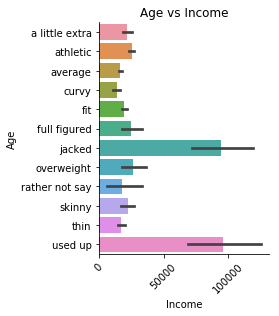

In [52]:
sns.factorplot(x='income', y = 'body_type', data = df_demographic, kind = 'bar')

 
plt.ylabel("Age")
plt.xlabel("Income")
plt.title("Age vs Income")

plt.xticks(rotation = 45)